### Задание
Поддерживать и стимулировать пользовательскую активность – важная задача для продукта, подобного нашему. Для этого наша команда маркетологов решила организовать флэшмоб в ленте новостей: участники должны сделать пост, где они рассказывают какой-то интересный факт о себе, и опубликовать его с хэштегом. Три поста, собравших наибольшее число лайков, получают призы.

Флэшмоб проходил с 2023-07-14 по 2023-07-20. Ваша задача как аналитика – оценить эффективность этого мероприятия.

1. Предположите, какие метрики должны были измениться во время флэшмоба и как. Почему?
2. Проверьте, реально ли эти метрики изменились, используя CausalImpact. Если изменение действительно произошло - опишите, как именно изменилась метрика и насколько.

### Какие метрики будем рассматривать:
1. DAU - одна из ключевых метрик приложения
2. Количество просмотров - флэшмоб привлекает внимание к просмотру постов, повлияло ли это на общее количество просмотров
3. Количество лайков - по этому критерию были выбраны победители флэшмоба, повлияло ли это на общее количество лайков
4. CTR - одна из ключевых метрик качества активности пользователей
5. Количество событий на одного пользователя - проверим, стали ли пользователи больше просматривать постов
6. Количество новых постов - задание флэшмоба опубликовать пост, повлияло ли это на общее количество новых постов

In [105]:
import pandas as pd
import pandahouse
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from causalimpact import CausalImpact

In [106]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20230720'
}

### 1. DAU

In [108]:
q_1 = """
SELECT toDate(time) AS day,
    uniqExact(user_id) AS dau
FROM {db}.feed_actions 
GROUP BY day
ORDER BY day
"""

df_dau = pandahouse.read_clickhouse(query=q_1, connection=connection)
df_dau = df_dau.set_index('day')
df_dau.head()

,dau
day,
2023-06-03,878
2023-06-04,2238
2023-06-05,3105
2023-06-06,3721
2023-06-07,4617


In [109]:
sns.set(rc={'figure.figsize':(18,5)})

<Axes: xlabel='day', ylabel='dau'>

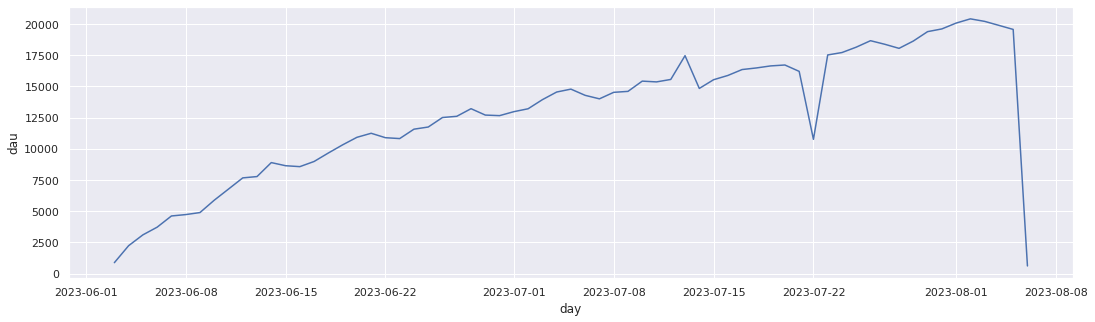

In [110]:
sns.lineplot(x='day', y='dau', data=df_dau)

In [111]:
impact_1 = CausalImpact(data=df_dau,
                      pre_period=['2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-05 21:24:08.798946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:24:08.834722: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:24:09.547329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:

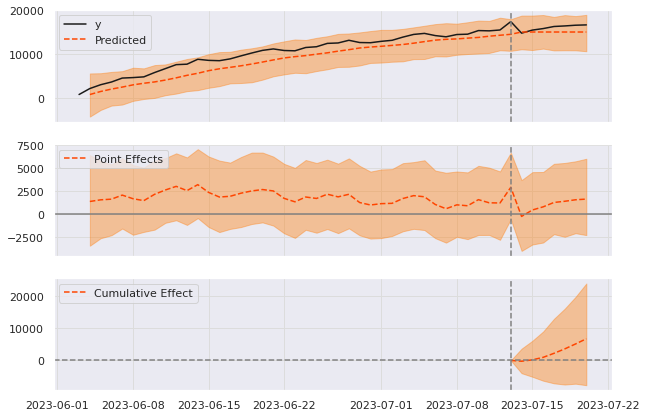

In [112]:
impact_1.plot()

In [113]:
print(impact_1.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16052.71           112369.0
Prediction (s.d.)         15087.48 (1206.49) 105612.35 (8445.43)
95% CI                    [12690.11, 17419.47][88830.8, 121936.28]

Absolute effect (s.d.)    965.24 (1206.49)   6756.65 (8445.43)
95% CI                    [-1366.75, 3362.6] [-9567.28, 23538.2]

Relative effect (s.d.)    6.4% (8.0%)        6.4% (8.0%)
95% CI                    [-9.06%, 22.29%]   [-9.06%, 22.29%]

Posterior tail-area probability p: 0.19
Posterior prob. of a causal effect: 80.82%

For more details run the command: print(impact.summary('report'))


In [114]:
print(impact_1.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 16052.71. In the absence of an
intervention, we would have expected an average response of 15087.48.
The 95% interval of this counterfactual prediction is [12690.11, 17419.47].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 965.24 with a 95% interval of
[-1366.75, 3362.6]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 112369.0.
Had the intervention not taken place, we would have expected
a sum of 105612.35. The 95% interval of this prediction is [88830.8, 121936.28].


The above results are given in terms of absolute numbers. In relative
terms, the response variab

### Вывод по DAU:
Исследуемая метрика показала рост на +7,91%.

Вмешательство (флэшмоб) дало положительный эффект, но этот эффект не является статистически значимым при рассмотрении всего периода после вмешательства (флэшмоб) в целом. Видимый эффект может быть результатом случайных колебаний, не связанных с вмешательством.

Эффект может быть ложным и не считается статистически значимым.

### 2. Количество просмотров

In [116]:
q_2 = """
SELECT toDate(time) AS day,
    countIf(action='view') AS views
FROM {db}.feed_actions 
GROUP BY day
ORDER BY day
"""

df_views = pandahouse.read_clickhouse(query=q_2, connection=connection)
df_views = df_views.set_index('day')
df_views.head()

,views
day,
2023-06-03,7603
2023-06-04,62770
2023-06-05,105526
2023-06-06,118996
2023-06-07,174454


<Axes: xlabel='day', ylabel='views'>

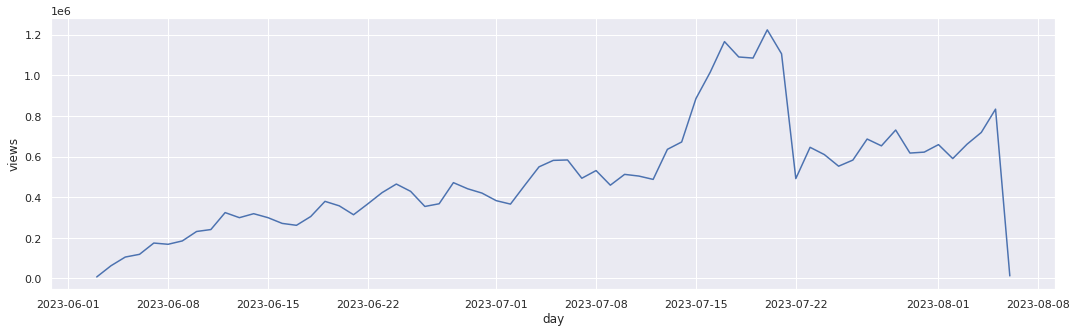

In [117]:
sns.lineplot(x='day', y='views', data=df_views)

In [118]:
impact_2 = CausalImpact(data=df_views,
                      pre_period=['2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-05 21:24:51.796290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:24:51.825447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:24:53.283775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:

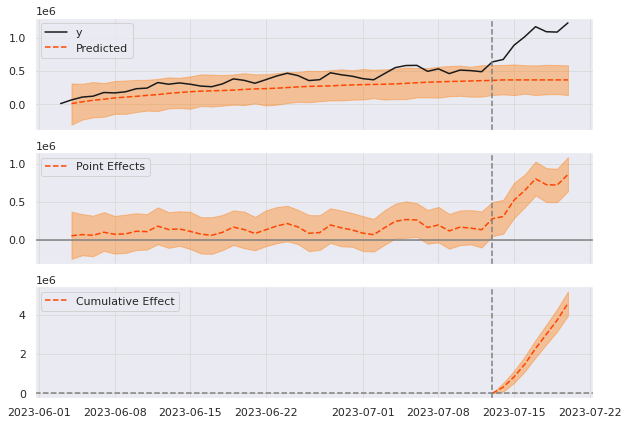

In [119]:
impact_2.plot()

In [120]:
print(impact_2.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1019947.31         7139631.0
Prediction (s.d.)         364377.97 (46532.65)2550645.75 (325728.56)
95% CI                    [270795.33, 453200.01][1895567.23, 3172400.01]

Absolute effect (s.d.)    655569.38 (46532.65)4588985.0 (325728.56)
95% CI                    [566747.3, 749151.98][3967230.99, 5244063.77]

Relative effect (s.d.)    179.91% (12.77%)   179.91% (12.77%)
95% CI                    [155.54%, 205.6%]  [155.54%, 205.6%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [121]:
print(impact_2.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1019947.31. By contrast, in the absence of an
intervention, we would have expected an average response of 364377.97.
The 95% interval of this counterfactual prediction is [270795.33, 453200.01].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 655569.38 with a 95% interval of
[566747.3, 749151.98]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 7139631.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 2550645.75. The 95% interval of this prediction is [1895567.23, 3172400.01].


The above results are given in terms of absolute numb

### Вывод по количеству просмотров:
В относительном выражении переменная показала увеличение на +180,98%. Интервал в 95% составляет [152,02%, 213,31%]. 

Это означает, что положительный эффект, наблюдаемый в период флэшмоба, статистически значителен и вряд ли будет вызван случайными колебаниями. Байесовская односторонняя вероятность зоны хвоста р = 0,0.

Это означает, что причинный эффект может считаться статистически значимым.

### 3. Количество лайков

In [122]:
q_3 = """
SELECT toDate(time) AS day,
    countIf(action='like') AS likes
FROM {db}.feed_actions 
GROUP BY day
ORDER BY day
"""

df_likes = pandahouse.read_clickhouse(query=q_3, connection=connection)
df_likes = df_likes.set_index('day')
df_likes.head()

,likes
day,
2023-06-03,1560
2023-06-04,12816
2023-06-05,20958
2023-06-06,23800
2023-06-07,34504


<Axes: xlabel='day', ylabel='likes'>

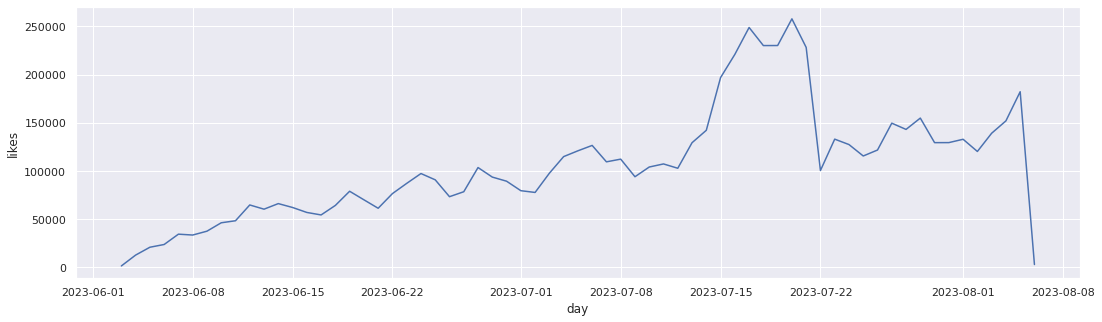

In [123]:
sns.lineplot(x='day', y='likes', data=df_likes)

In [124]:
impact_3 = CausalImpact(data=df_likes,
                      pre_period'2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-05 21:25:35.027874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:25:35.058020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:25:35.645163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:

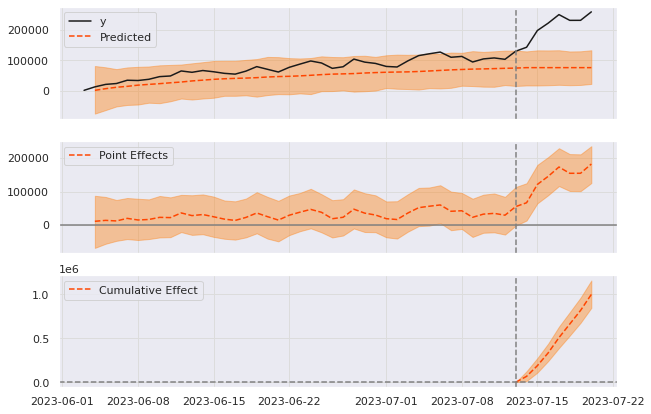

In [125]:
impact_3.plot()

In [126]:
print(impact_3.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    218090.14          1526631.0
Prediction (s.d.)         75657.93 (11989.5) 529605.5 (83926.5)
95% CI                    [51784.32, 98782.3][362490.23, 691476.15]

Absolute effect (s.d.)    142432.22 (11989.5)997025.5 (83926.5)
95% CI                    [119307.84, 166305.82][835154.85, 1164140.77]

Relative effect (s.d.)    188.26% (15.85%)   188.26% (15.85%)
95% CI                    [157.69%, 219.81%] [157.69%, 219.81%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [127]:
print(impact_3.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 218090.14. By contrast, in the absence of an
intervention, we would have expected an average response of 75657.93.
The 95% interval of this counterfactual prediction is [51784.32, 98782.3].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 142432.22 with a 95% interval of
[119307.84, 166305.82]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1526631.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 529605.5. The 95% interval of this prediction is [362490.23, 691476.15].


The above results are given in terms of absolute numbers. In 

### Вывод по количеству лайков:
В относительном выражении переменная показала увеличение на +188.32%. Интервал в 95% составляет [159.48%, 218.78%]. 

Это означает, что положительный эффект, наблюдаемый в период флэшмоба, статистически значителен и вряд ли будет вызван случайными колебаниями. Байесовская односторонняя вероятность зоны хвоста р = 0,0.

Это означает, что причинный эффект может считаться статистически значимым.

### 4. CTR

In [128]:
q_4 = """
SELECT toDate(time) AS day,
    countIf(action='like')/countIf(action='view') AS ctr
FROM {db}.feed_actions 
GROUP BY day
ORDER BY day
"""

df_ctr = pandahouse.read_clickhouse(query=q_4, connection=connection)
df_ctr = df_ctr.set_index('day')
df_ctr.head()

,ctr
day,
2023-06-03,0.205182
2023-06-04,0.204174
2023-06-05,0.198605
2023-06-06,0.200007
2023-06-07,0.197783


<Axes: xlabel='day', ylabel='ctr'>

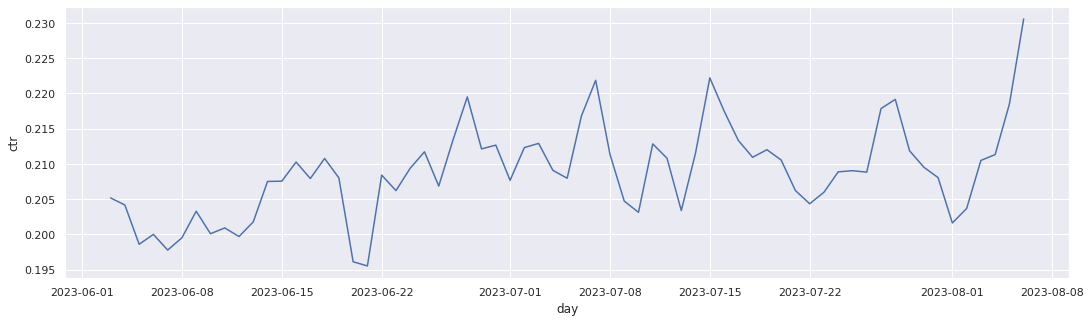

In [129]:
sns.lineplot(x='day', y='ctr', data=df_ctr)

In [130]:
impact_4 = CausalImpact(data=df_ctr,
                      pre_period=['2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-05 21:26:39.897154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:26:39.929670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:26:40.647215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:

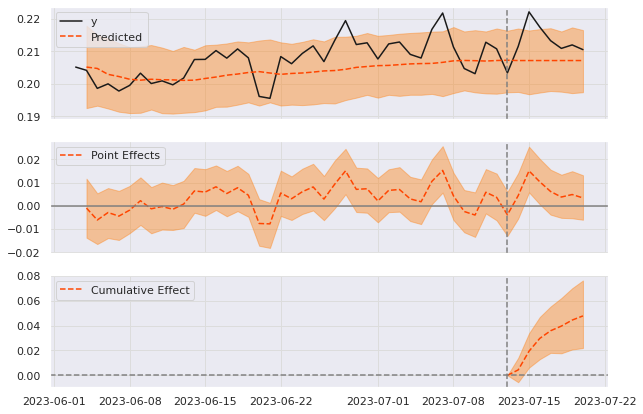

In [131]:
impact_4.plot()

In [132]:
print(impact_4.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               1.5
Prediction (s.d.)         0.21 (0.0)         1.45 (0.01)
95% CI                    [0.2, 0.21]        [1.42, 1.48]

Absolute effect (s.d.)    0.01 (0.0)         0.05 (0.01)
95% CI                    [0.0, 0.01]        [0.02, 0.08]

Relative effect (s.d.)    3.3% (1.0%)        3.3% (1.0%)
95% CI                    [1.46%, 5.4%]      [1.46%, 5.4%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.9%

For more details run the command: print(impact.summary('report'))


In [133]:
print(impact_4.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 0.21. By contrast, in the absence of an
intervention, we would have expected an average response of 0.21.
The 95% interval of this counterfactual prediction is [0.2, 0.21].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 0.01 with a 95% interval of
[0.0, 0.01]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1.5.
By contrast, had the intervention not taken place, we would have expected
a sum of 1.45. The 95% interval of this prediction is [1.42, 1.48].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an incre

### Вывод по CTR:
В относительном выражении переменная показала увеличение на +3.28%. Интервал в 95% составляет [1.46%, 4.99%]. 

Это означает, что положительный эффект, наблюдаемый в период флэшмоба, статистически значителен и вряд ли будет вызван случайными колебаниями. Байесовская односторонняя вероятность зоны хвоста р = 0,0.

Это означает, что причинный эффект может считаться статистически значимым.

### 5. Количество событий на одного уникального пользователя

In [134]:
q_2 = """
SELECT toDate(time) AS day,
    count(action)/uniqExact(user_id) AS action_user
FROM {db}.feed_actions 
GROUP BY day
ORDER BY day
"""

df_action_user = pandahouse.read_clickhouse(query=q_2, connection=connection)
df_action_user = df_action_user.set_index('day')
df_action_user.head()

,action_user
day,
2023-06-03,10.436219
2023-06-04,33.773905
2023-06-05,40.735588
2023-06-06,38.375705
2023-06-07,45.258393


<Axes: xlabel='day', ylabel='action_user'>

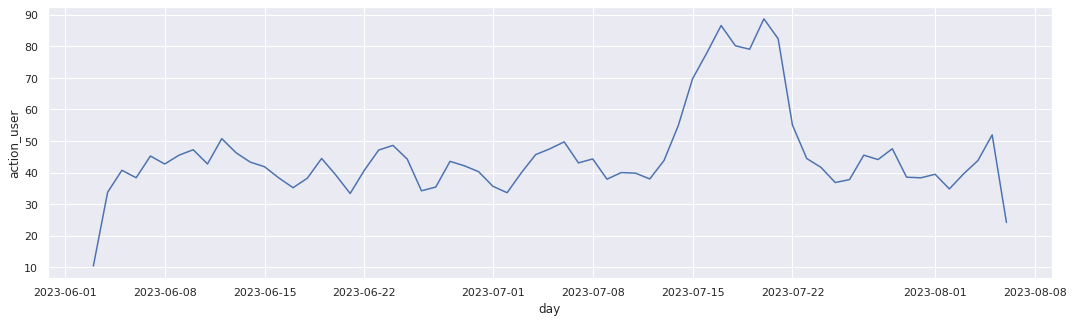

In [135]:
sns.lineplot(x='day', y='action_user', data=df_action_user)

In [136]:
impact_5 = CausalImpact(data=df_action_user,
                      pre_period=['2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-05 21:27:28.299066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:27:28.334777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:27:29.020015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:

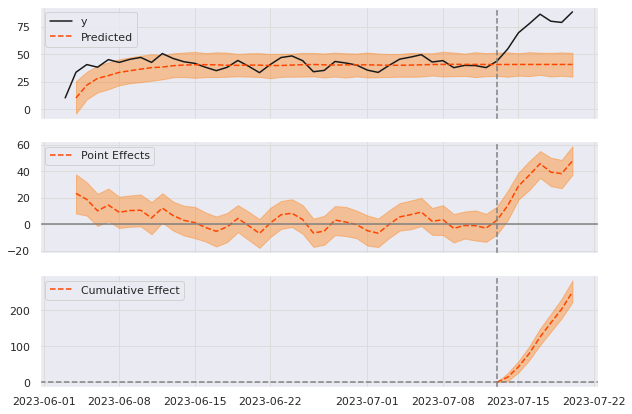

In [137]:
impact_5.plot()

In [138]:
print(impact_5.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    76.74              537.15
Prediction (s.d.)         40.84 (2.21)       285.89 (15.5)
95% CI                    [36.31, 44.99]     [254.15, 314.91]

Absolute effect (s.d.)    35.89 (2.21)       251.26 (15.5)
95% CI                    [31.75, 40.43]     [222.24, 282.99]

Relative effect (s.d.)    87.89% (5.42%)     87.89% (5.42%)
95% CI                    [77.74%, 98.99%]   [77.74%, 98.99%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


print(impact_5.summary('report'))

### Вывод по количеству событий на одного уникального пользователя:
В относительном выражении переменная показала увеличение на +87.95%. Интервал в 95% составляет [77.12%, 100.3%]. 

Это означает, что положительный эффект, наблюдаемый в период флэшмоба, статистически значителен и вряд ли будет вызван случайными колебаниями. Байесовская односторонняя вероятность зоны хвоста р = 0,0.

Это означает, что причинный эффект может считаться статистически значимым.

### 6. Количество новых постов

In [140]:
q_6 = """
SELECT first_day AS day,
    COUNT(post_id) AS new_posts
FROM (
    SELECT post_id,
        MIN(toDate(time)) AS first_day
    FROM {db}.feed_actions 
    GROUP BY post_id
    )
GROUP BY day
ORDER BY day
"""

df_new_posts = pandahouse.read_clickhouse(q_6, connection=connection)
df_new_posts = df_new_posts.set_index('day')
df_new_posts.head()

,new_posts
day,
2023-06-03,89
2023-06-04,97
2023-06-05,61
2023-06-06,87
2023-06-07,70


<Axes: xlabel='day', ylabel='new_posts'>

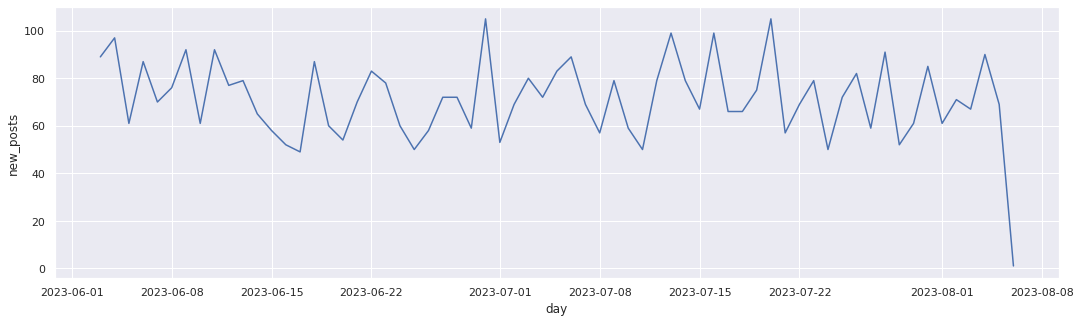

In [141]:
sns.lineplot(x='day', y='new_posts', data=df_new_posts)

In [142]:
impact_6 = CausalImpact(data=df_new_posts,
                      pre_period=['2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-05 21:28:26.332541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:28:26.357347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:28:26.949261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-05 21:

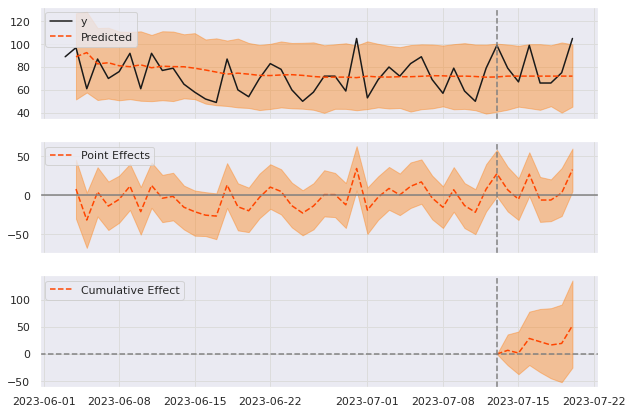

In [143]:
impact_6.plot()

In [144]:
print(impact_6.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    79.57              557.0
Prediction (s.d.)         72.05 (5.93)       504.34 (41.48)
95% CI                    [60.21, 83.44]     [421.44, 584.05]

Absolute effect (s.d.)    7.52 (5.93)        52.66 (41.48)
95% CI                    [-3.86, 19.37]     [-27.05, 135.56]

Relative effect (s.d.)    10.44% (8.23%)     10.44% (8.23%)
95% CI                    [-5.36%, 26.88%]   [-5.36%, 26.88%]

Posterior tail-area probability p: 0.11
Posterior prob. of a causal effect: 88.61%

For more details run the command: print(impact.summary('report'))


In [145]:
print(impact_6.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 79.57. In the absence of an
intervention, we would have expected an average response of 72.05.
The 95% interval of this counterfactual prediction is [60.21, 83.44].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 7.52 with a 95% interval of
[-3.86, 19.37]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 557.0.
Had the intervention not taken place, we would have expected
a sum of 504.34. The 95% interval of this prediction is [421.44, 584.05].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increase of +10

### Вывод по количеству новых постов:
В относительном выражении переменная показала увеличение на +10.47%. Интервал в 95% составляет [-3.66%, 24.17%]. 

Это означает, что, хотя вмешательство (флэшмоб), как представляется, дало положительный эффект, этот эффект не является статистически значимым при рассмотрении всего периода после вмешательства в целом. Видимый эффект может быть результатом случайных колебаний, не связанных с вмешательством.

Эффект может быть ложным и не считается статистически значимым.

### Общий вывод:
В течение недели проведения флэшмоба наблюдается значительное повышение следующих метрик: количество просмотров и лайков, количество событий на одного уникального пользователя и не большой рост CTR, но статистически значимый.

Изменение метрик DAU и количество новых постов не считается статичестически значимым.

Основная цель проведения флэшмоба выполнена - пользовательская активность выросла в период проведния флэшмоба.

### Имел ли флэшмоб какие-то долгосрочные эффекты? 
На графиках lineplot по каждой исследуемой метрике в период после проведения флэшмоба наблюдается величина, сопоставимая с этим показателем до проведения флэшмоба.

Для более детального вывода необходимо исследование других параметров. Но визуально долгосрочного эффекта от флешмоба нет.